<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%203.%20RNN%20(LSTM%2C%20GRU%2C%20BiRNN)/3.%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Разработка RNN модели с использованием TensorFlow

Создание рекуррентной нейронной сети (RNN) с использованием TensorFlow для решения различных задач требует глубокого понимания особенностей и тонкостей настройки параметров модели. В данном руководстве мы рассмотрим основные этапы разработки и обучения RNN для задач регрессии, классификации, кластеризации и обработки естественного языка (NLP).

## Введение в RNN

Рекуррентные нейронные сети (RNN) отличаются от обычных нейронных сетей наличием внутренней памяти, что позволяет им учитывать последовательность и зависимости данных. Это делает их особенно эффективными для работы с временными рядами, текстовыми данными, аудио и видео, где важен порядок следования элементов.

### Преимущества RNN:

- **Сохранение информации**: RNN могут запоминать информацию о предыдущих входах благодаря своей внутренней структуре.
- **Гибкость в обработке последовательностей**: модели могут работать с последовательностями переменной длины, что позволяет им адаптироваться к различным задачам.

Для реализации RNN в TensorFlow мы будем использовать высокоуровневую библиотеку Keras, которая предоставляет удобные интерфейсы и готовые слои, что значительно упрощает процесс разработки моделей.

## Подготовка данных

Перед реализацией RNN важно правильно подготовить данные. Этапы подготовки могут включать следующие шаги:

1. **Сбор и разметка данных**: собираем необходимые данные и при необходимости проводим их разметку.
2. **Разделение данных**: делим данные на тренировочную, валидационную и тестовую выборки для последующей оценки модели.
3. **Преобразование данных**: нормализуем данные (для временных рядов) или токенизируем текст (для NLP), чтобы привести их в формат, подходящий для RNN.
4. **Создание временных окон**: формируем временные окна для задач с временными рядами и NLP, что позволяет модели учитывать предшествующие значения.

Далее мы рассмотрим основные шаги реализации RNN для различных типов задач.

## 1. RNN для регрессии

Регрессия применяется, когда нужно предсказать непрерывные значения, такие как цены акций, уровень температуры или другие количественные характеристики.

### Шаг 1: Подготовка данных

Для регрессии с временными рядами часто применяют **окна скользящего среднего**. Это позволяет модели учитывать контекст предыдущих значений.

- Разделите временной ряд на последовательности фиксированной длины, используя, например, `tf.keras.preprocessing.sequence.TimeseriesGenerator`.
- Нормализуйте данные для повышения устойчивости модели, что помогает улучшить сходимость во время обучения.

### Шаг 2: Построение модели RNN

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Определяем параметры модели
window_size = 10  # длина окна
num_features = 1  # количество признаков

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features)),
    Dense(1)  # Один выходной нейрон для предсказания непрерывного значения
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
```

### Шаг 3: Тренировка модели

```python
history = model.fit(train_data, train_labels, epochs=50, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Для оценки точности предсказаний используем метрики **MSE** (среднеквадратичная ошибка) и **MAE** (средняя абсолютная ошибка).

```python
test_loss, test_mae = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

Для регрессии важно настроить следующие параметры:

- **Количество нейронов**: это влияет на способность модели обобщать данные. Большее количество нейронов может повысить точность, но также увеличивает риск переобучения.
- **Длина окна**: чем больше окно, тем больше данных учитывается, что может улучшить предсказания.
- **Количество эпох и размер батча**: большее количество эпох с меньшим размером батча может помочь улучшить результаты, но замедляет обучение.

## 2. RNN для классификации

Классификация используется для анализа текстов, предсказания событий, определения категории текста и других задач, связанных с разделением данных на классы.

### Шаг 1: Подготовка данных

Для задач классификации необходимо:

- Токенизировать данные (если это текст) с помощью `Tokenizer`, чтобы преобразовать слова в числовые последовательности.
- Выравнивать последовательности с помощью `pad_sequences`, чтобы получить фиксированную длину входных данных, что важно для работы RNN.

### Шаг 2: Построение модели RNN

```python
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Параметры модели
vocab_size = 10000  # размер словаря
embedding_dim = 128  # размер вектора эмбеддинга
max_length = 100  # максимальная длина последовательности
num_classes = 3  # количество классов

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(50, activation='tanh'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

### Шаг 3: Тренировка модели

```python
history = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Для оценки качества классификации применяются метрики **Accuracy** (точность), **Precision** и **Recall**:

```python
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

Для задач классификации важно учитывать следующие параметры:

- **Размер вектора эмбеддинга**: увеличивает пространство признаков для текстовых данных, что может улучшить качество классификации.
- **Количество классов**: для мультиклассовой классификации выбираем функцию потерь `categorical_crossentropy`.
- **Количество эпох и размер батча**: эти параметры влияют на качество и скорость тренировки модели, и их настройка требует экспериментов.

## 3. RNN для кластеризации

Задачи кластеризации требуют выявления скрытых групп в данных. RNN не так часто применяются для кластеризации, но могут быть полезны, например, для анализа временных рядов, где цель — разделить данные на различные паттерны.

### Шаг 1: Подготовка данных

Для кластеризации временных рядов:

- Разделите данные на временные окна, что позволяет извлекать особенности временных зависимостей.
- Нормализуйте данные, так как RNN чувствительна к масштабированию данных.

### Шаг 2: Построение модели RNN

Обычно используют RNN с функцией потерь **Mean Squared Error (MSE)** и обучают ее на невиданных данных. На этапе вывода можно применять алгоритмы кластеризации, такие как KMeans, к полученным признакам.

```python
from sklearn.cluster import KMeans

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features), return_sequences=True),
    Dense(10, activation='relu')  # Несколько выходных нейронов для извлечения признаков
])
model.compile(optimizer='adam', loss='mse')
```

### Шаг 3: Получение признаков и кластеризация

После тренировки RNN примените ее к данным и извлеките признаки. На основе этих признаков проведите кластеризацию с помощью KMeans.

```python
features = model.predict(data)
kmeans = KMeans(n_clusters=num_clusters).fit(features)
clusters = kmeans.predict(features)
```

## 4. RNN для NLP задач

Для задач обработки естественного языка, таких как машинный перевод и анализ тональности, часто используются RNN, особенно такие их разновидности, как LSTM и GRU, которые лучше справляются с длинными зависимостями в тексте.

### Шаг 1: Подготовка данных

- **Токенизация текста**: преобразуем текст в последовательности индексов с помощью `Tokenizer`, что позволяет модели работать с текстовыми данными.
- **Выравнивание длины последовательностей**: используем `pad_sequences`, чтобы привести все последовательности к одной длине, что критически важно для обучения.

### Шаг 2: Построение модели RNN для NLP

```python
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Параметры модели
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Для задач бинарной классификации
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

### Шаг 3: Тренировка модели



```python
history = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Оценку NLP-модели можно проводить по метрикам **Accuracy**, **Precision**, **Recall** и **F1**:

```python
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

При настройке гиперпараметров для задач NLP необходимо учитывать:

- **Количество нейронов в скрытых слоях**: это влияет на способность модели захватывать сложные зависимости в данных.
- **Размер вектора эмбеддинга**: его увеличение может улучшить качество представления слов.
- **Количество LSTM/GRU слоев**: увеличение количества слоев может повысить качество модели, но также увеличивает риск переобучения.



Давайте подробнее рассмотрим примеры реализации RNN в TensorFlow для различных задач, включая более конкретные подходы и кодовые фрагменты.

### 1. RNN для Регрессии: Пример Прогнозирования Временных Рядов

Рассмотрим пример, в котором мы предсказываем цены акций на основе исторических данных.

#### Шаг 1: Подготовка данных

Предположим, у нас есть временной ряд с ценами акций.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  31/2547 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.2034

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2547/2547 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0099 - val_loss: 2.3675e-04
Epoch 2/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0011 - val_loss: 9.0529e-04
Epoch 3/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 9.1569e-04 - val_loss: 0.0015
Epoch 4/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 7.8207e-04 - val_loss: 5.6267e-04
Epoch 5/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 7.1280e-04 - val_loss: 4.6675e-04
Epoch 6/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 8.7582e-04 - val_loss: 2.0909e-04
Epoch 7/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.7701e-04 - val_loss: 3.9365e-04
Epoch 8/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.9526e-04 - val_loss: 0.0012
Epoch 9/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 7.1715e-04 - val_loss: 5.0082e-04
Epoch 10/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 6.7126e-04 - val_loss: 3.5450e-04
Epoch 11/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - l

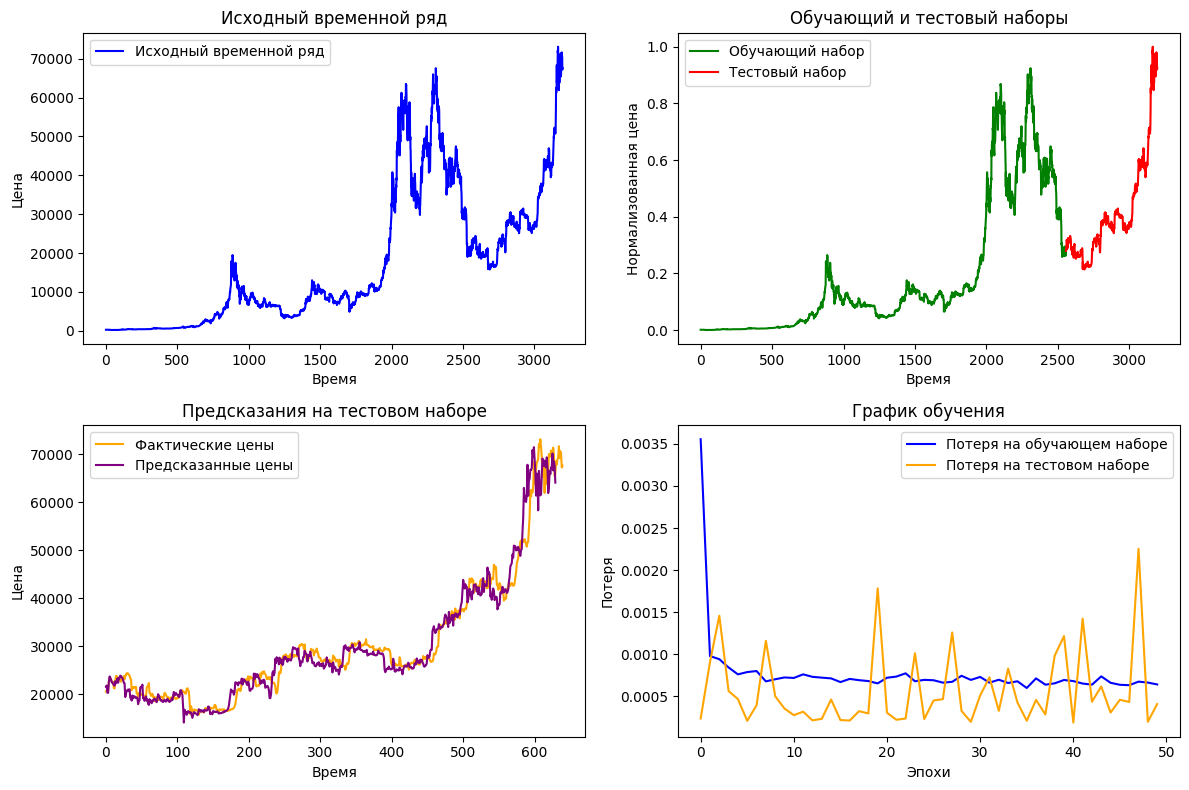

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную и тестовую выборки
train_size = int(len(scaled_prices) * 0.8)
train, test = scaled_prices[:train_size], scaled_prices[train_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
# График исходного временного ряда
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на тестовом наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Можно использовать EarlyStopping для остановки обучения модели, если она перестает показывать улучшения на валидационном наборе данных. Это позволяет избежать переобучения и сэкономить время, останавливая процесс обучения, когда модель больше не улучшает свои результаты.

Пример использования EarlyStopping:

Epoch 1/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 2/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.8787e-04 - val_loss: 4.0200e-04
Epoch 4/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 7.6182e-04 - val_loss: 0.0023
Epoch 5/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.8103e-04 - val_loss: 0.0015
Epoch 6/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 9.0974e-04 - val_loss: 3.7940e-04
Epoch 7/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 7.4215e-04 - val_loss: 2.3535e-04
Epoch 8/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 6.8396e-04 - val_loss: 0.0012
Epoch 9/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.9486e-04 - val_loss: 6.3533e-04
Epoch 10/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.9808e-04 - val_loss: 2.1309e-04
Epoch 11/50
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - los

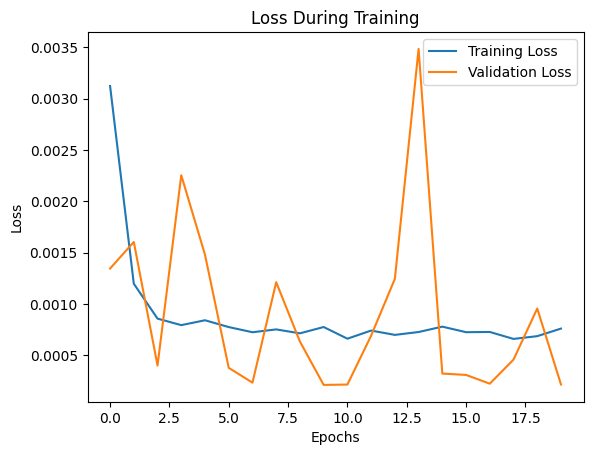

630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


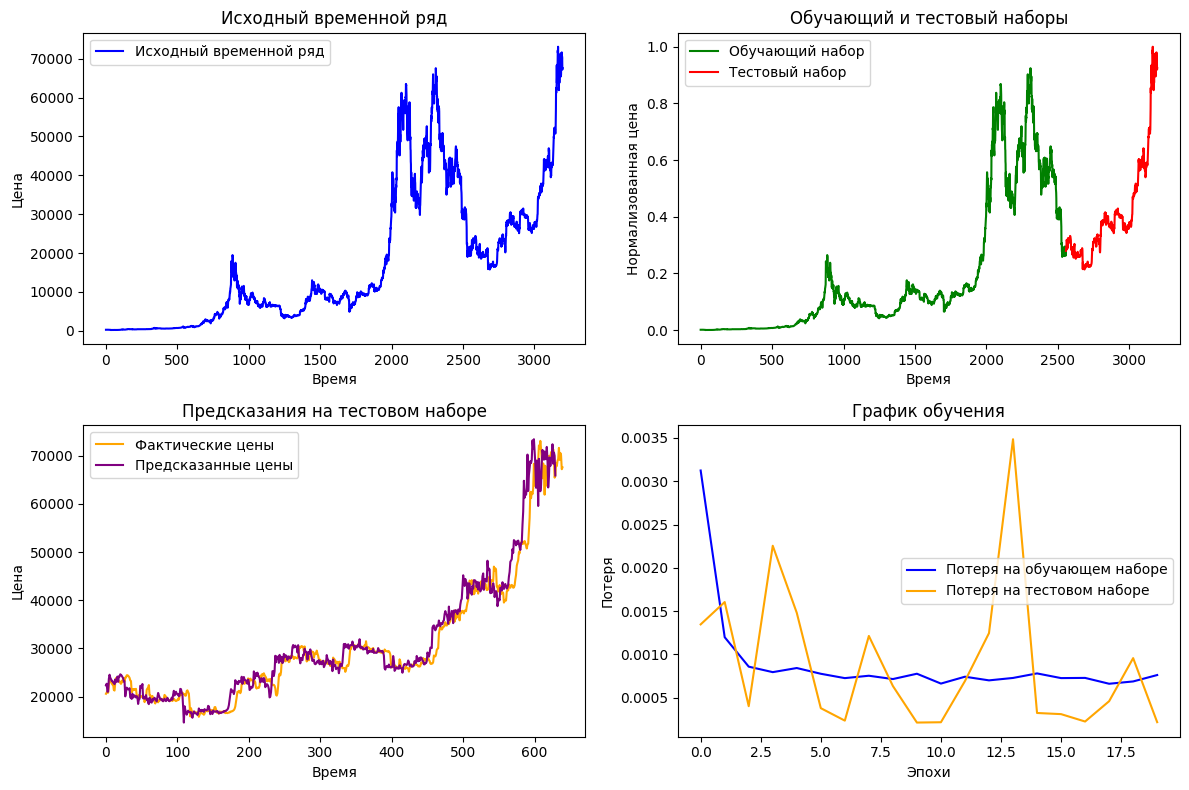

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Создание модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Настройка EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping])


# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
# График исходного временного ряда
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на тестовом наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Теперь мы используем обученную модель для прогнозирования цен на 30 шагов вперед. Этот процесс включает в себя применение последнего известного значения временного ряда в качестве начальной точки для генерации предсказаний. В каждом шаге мы будем предсказывать следующую цену, обновляя входные данные на основе предыдущего предсказания. Это позволит нам оценить способность модели к экстраполяции и анализу будущих значений на основе имеющихся данных.

После получения предсказаний мы проведем обратную нормализацию, чтобы вернуть значения в исходный масштаб, что позволит лучше интерпретировать результаты. Визуализация предсказанных цен на графике даст нам наглядное представление о том, как модель справляется с прогнозированием.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

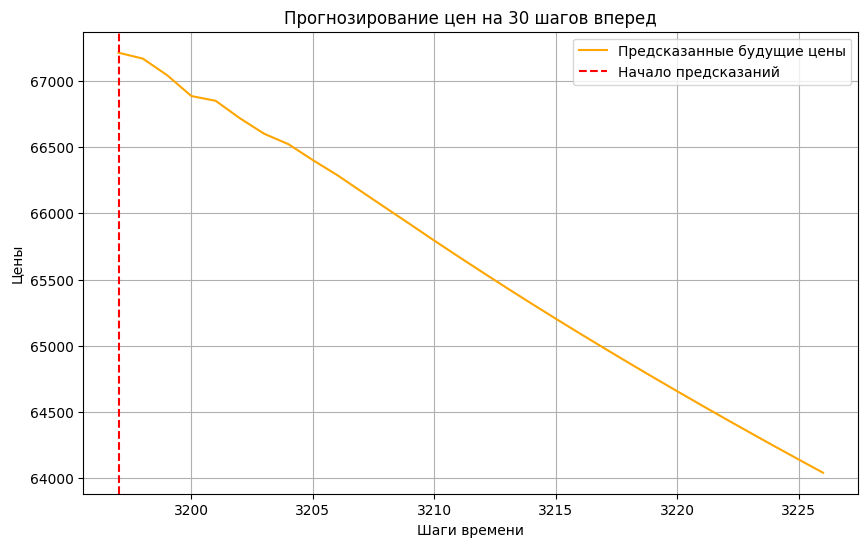

In [ ]:
# Предсказание на H шагов вперед
H = 30  # Количество шагов вперед
predicted_prices = []

# Начнем с последнего известного значения
last_input = scaled_prices[-window_size:]

for _ in range(H):
    # Прогнозируем следующее значение
    next_price = model.predict(last_input.reshape((1, window_size, 1)))
    predicted_prices.append(next_price[0, 0])

    # Обновляем входные данные
    last_input = np.append(last_input[1:], next_price).reshape(window_size, 1)

# Обратная нормализация
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Визуализация результатов с подписями
plt.figure(figsize=(10, 6))
plt.plot(range(len(scaled_prices), len(scaled_prices) + H), predicted_prices, label='Предсказанные будущие цены', color='orange')
plt.axvline(x=len(scaled_prices), color='red', linestyle='--', label='Начало предсказаний')
plt.title('Прогнозирование цен на 30 шагов вперед')
plt.xlabel('Шаги времени')
plt.ylabel('Цены')
plt.legend()
plt.grid()
plt.show()

##RNN для многомерного временного ряда
Чтобы адаптировать наш код для многомерного временного ряда, вам нужно изменить входные данные и форму данных в модели. Вот обновленный код:


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0352 - val_loss: 4.6356e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 2.9224e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 1.9022e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 1.7584e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 3.0113e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 1.4086e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 1.5023e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 1.1500e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.6280e-04 - val_loss: 3.3140e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 1.3936e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 5.9934e-05
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━

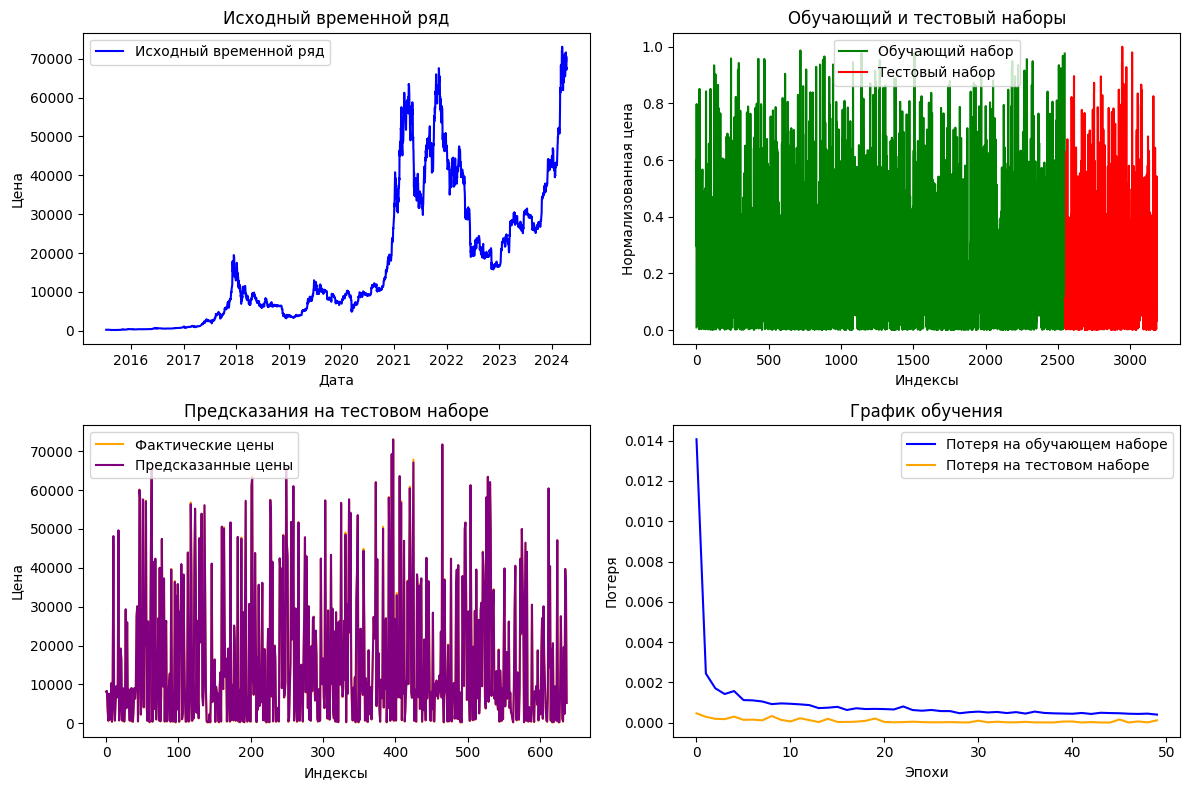

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Чтение и предобработка данных
df = pd.read_csv('/content/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Параметры для временного ряда
window_size = 10  # Размер окна
num_features = scaled_data.shape[1]  # Количество признаков

# Формирование входных данных X и выходных данных Y
X, Y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i + window_size])
    Y.append(scaled_data[i + window_size, 0])  # Предсказываем столбец 'Close'

X = np.array(X)
Y = np.array(Y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создание модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features)),
    Dropout(0.2),
    Dense(1)  # Один выходной нейрон для предсказания одной величины
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Настройка EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Предсказания на тестовом наборе
predictions = model.predict(X_test)

# Обратное преобразование предсказанных данных
predictions_full = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_full[:, 0] = predictions.flatten()
predictions_inverse = scaler.inverse_transform(predictions_full)[:, 0]

# Восстановление Y_test для обратной нормализации
Y_test_full = np.zeros((Y_test.shape[0], scaled_data.shape[1]))
Y_test_full[:, 0] = Y_test
Y_test_inverse = scaler.inverse_transform(Y_test_full)[:, 0]

# Визуализация результатов
plt.figure(figsize=(12, 8))

# График исходного временного ряда
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Close'], label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# График обучающего и тестового наборов
train_size = len(X_train)
plt.subplot(2, 2, 2)
plt.plot(range(train_size), Y_train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + len(Y_test)), Y_test, label='Тестовый набор', color='red')
plt.title('Обучающий и тестовый наборы')
plt.xlabel('Индексы')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(Y_test_inverse, label='Фактические цены', color='orange')
plt.plot(predictions_inverse, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Индексы')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на тестовом наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

##3. RNN для кластеризации временных рядов

Кластеризация временных рядов — это метод анализа, который позволяет группировать временные ряды на основе их схожести. Этот подход может быть полезен для выявления паттернов, трендов и аномалий в данных. Основные аспекты кластеризации временных рядов включают:

1. **Сравнение временных рядов**: Кластеризация помогает сравнивать временные ряды, выявляя те, которые имеют схожие характеристики, например, сезонность или тренды.

2. **Методы кластеризации**: Для кластеризации временных рядов могут использоваться различные алгоритмы, такие как K-средних, иерархическая кластеризация и другие методы, которые учитывают временные зависимости и структуру данных.

3. **Применение**: Кластеризация может быть использована в различных областях, включая финансовый анализ, мониторинг здоровья, прогнозирование спроса и многое другое.

4. **Предобработка данных**: Часто перед кластеризацией временные ряды нормализуют или трансформируют, чтобы улучшить качество кластеризации.

Таким образом, кластеризация временных рядов является мощным инструментом для анализа и интерпретации сложных временных данных.


Вот подход, который объединяет RNN для извлечения признаков с методом кластеризации:

1. **Извлечение признаков с помощью RNN**: RNN обучается на временных последовательностях, но вместо использования финального слоя для предсказания значений, мы будем использовать ее скрытые состояния (hidden states) как вектор признаков.
2. **Кластеризация скрытых состояний**: После извлечения скрытых состояний для всех временных окон можно применять алгоритм кластеризации, чтобы группировать временные ряды на основе этих представлений.

Вот пример кода, в котором используется RNN для создания представлений (эмбеддингов), после чего выполняется кластеризация:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


<ipython-input-45-b70d6235ba10>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters['Cluster'] = clusters


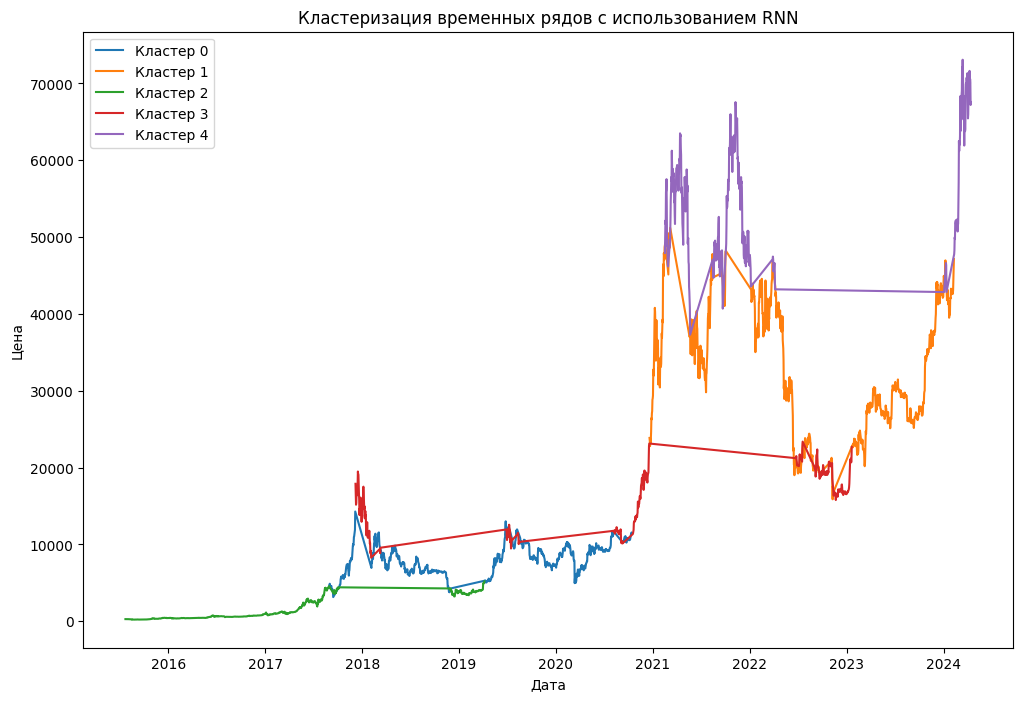

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Model

# Загрузка и предобработка данных
df = pd.read_csv('/content/BTC-USD.csv')  # Замените на ваш файл
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Определение параметров окна
window_size = 10  # Размер окна
num_features = scaled_data.shape[1]  # Количество признаков

# Подготовка входных данных для RNN
sequences = []
for i in range(len(scaled_data) - window_size):
    sequences.append(scaled_data[i:i + window_size])

sequences = np.array(sequences)  # Преобразуем в numpy массив

# Определение модели RNN для извлечения признаков
feature_extractor = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features), return_sequences=False),
    Dense(10, activation='relu')  # Слой для создания компактного представления
])

# Получение эмбеддингов для всех последовательностей
features = feature_extractor.predict(sequences)

# Кластеризация с использованием KMeans
num_clusters = 5  # Определите количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Добавление кластеров в DataFrame для анализа
df_clusters = df.iloc[window_size:]
df_clusters['Cluster'] = clusters

# Визуализация кластеров
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    cluster_data = df_clusters[df_clusters['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Close'], label=f'Кластер {cluster}')

plt.title('Кластеризация временных рядов с использованием RNN')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()



### Пояснение

1. **Извлечение эмбеддингов**: Модель RNN обучается и получает эмбеддинги (представления) для каждой временной последовательности длиной `window_size`. Эти представления передаются через полносвязный слой для создания вектора признаков размером 10.
2. **Кластеризация**: После извлечения признаков с помощью RNN, `KMeans` выполняет кластеризацию на этих векторах, представляющих временные ряды.
3. **Визуализация кластеров**: Результаты кластеризации можно визуализировать, чтобы увидеть, как временные ряды группируются по кластерам.

Этот метод позволяет использовать преимущества RNN для анализа временных данных и эффективно выполнять кластеризацию на основе скрытых закономерностей.

##3. RNN прогнозирование цен на жилья

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 28/516 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1572

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0597 - val_loss: 0.0333
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0364 - val_loss: 0.0293
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0278 - val_loss: 0.0307
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0289 - val_loss: 0.0309
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0257 - val_loss: 0.0232
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0266 - val_loss: 0.0230
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0280 - val_loss: 0.0225
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0264 - val_loss: 0.0227
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0265 - val_loss: 0.0229
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0228 - val_loss: 0.0251
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0239 - val_loss: 0.0228
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - los

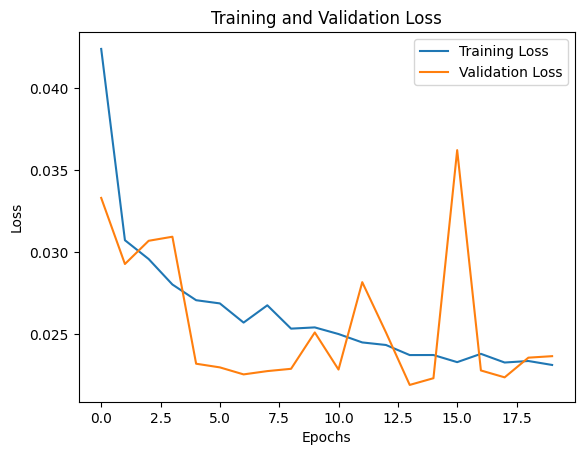

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


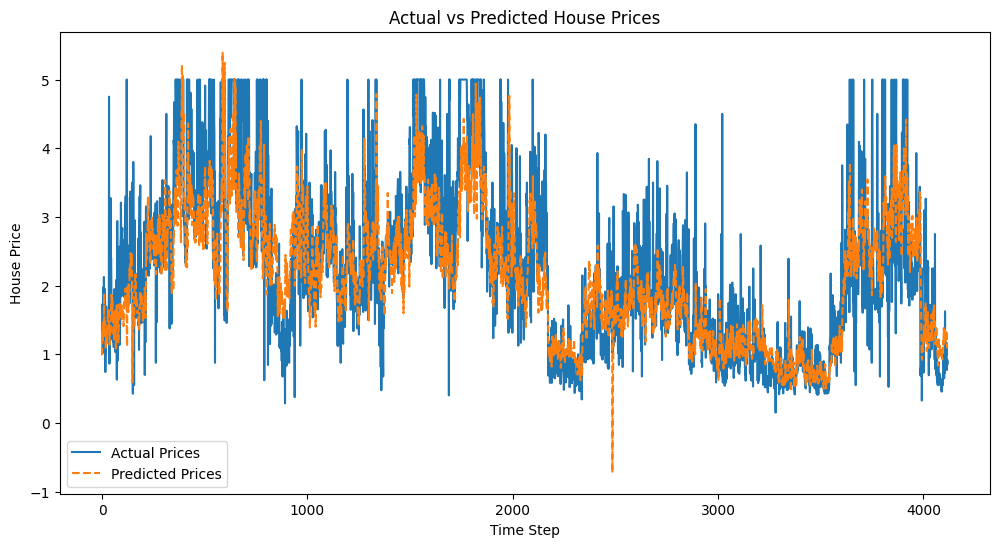

In [ ]:
# Импортируем библиотеки
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка альтернативного датасета California Housing
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target  # Добавляем столбец с ценой

# Масштабирование признаков для улучшения производительности RNN
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Преобразуем в DataFrame для удобства обработки
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Разделение данных на признаки и целевую переменную
X, y = scaled_df.drop('PRICE', axis=1).values, scaled_df['PRICE'].values

# Параметры последовательности
sequence_length = 10  # Длина временного окна
batch_size = 32

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создаем генераторы временных рядов для RNN
train_gen = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=batch_size)
test_gen = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=batch_size)

# Построение модели RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[1])),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(train_gen, validation_data=test_gen, epochs=20)

# Визуализация графика обучения
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Предсказание на тестовом наборе и визуализация результатов
predictions = model.predict(test_gen)
predicted_prices = scaler.inverse_transform(np.concatenate((X_test[sequence_length:], predictions), axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate((X_test[sequence_length:], y_test[sequence_length:].reshape(-1, 1)), axis=1))[:, -1]

# Построение графика реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Time Step')
plt.ylabel('House Price')
plt.legend()
plt.show()

## RNN и NLP

Давайте подробнее рассмотрим несколько задач в области обработки естественного языка (NLP), таких как анализ тональности, анализ настроения, кластеризация текста и классификация текста. Для каждой задачи я предложу разные подходы к преобразованию текста в векторы, а также опишу соответствующие алгоритмы и примеры реализации.

### 1. Анализ Тональности

**Задача**: Определить, является ли текст положительным, отрицательным или нейтральным.





Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.3646 - loss: 0.8073 - val_accuracy: 0.2500 - val_loss: 0.7021
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6667 - loss: 0.7039 - val_accuracy: 0.7500 - val_loss: 0.6908
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4688 - loss: 0.6888 - val_accuracy: 0.7500 - val_loss: 0.6851
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4792 - loss: 0.6939 - val_accuracy: 0.7500 - val_loss: 0.6952
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6771 - loss: 0.6701 - val_accuracy: 0.2500 - val_loss: 0.7018
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.5816 - val_accuracy: 0.0000e+00 - val_loss: 0.7100
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6712 - val_accuracy: 0.0000e+00 - val_loss: 0.7123
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5833 - loss: 0.6561 - val_accuracy: 0.0000e+00 - val_

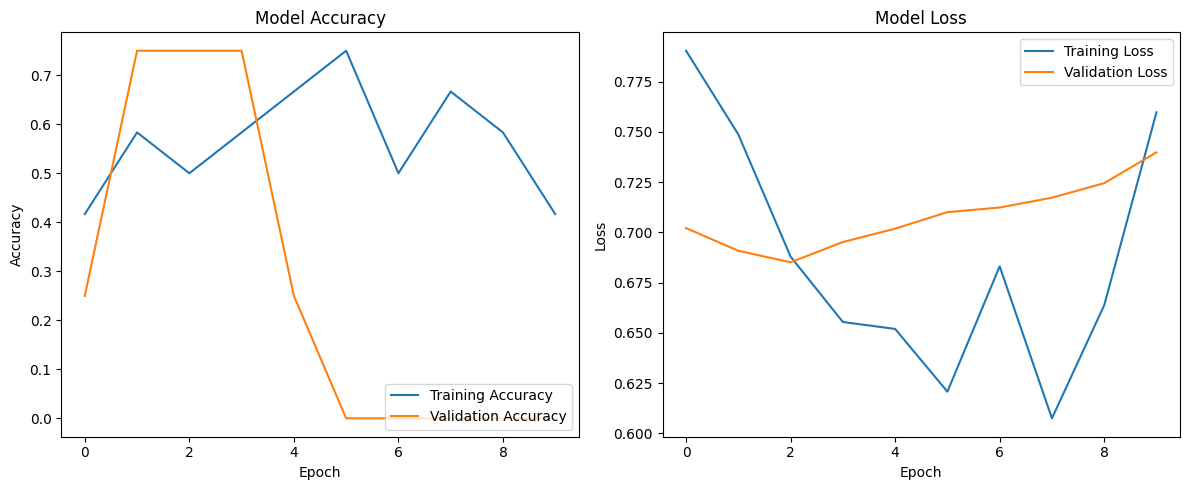

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Review: 'I enjoyed this film very much' -> Sentiment: Positive
Review: 'It was a complete waste of my time' -> Sentiment: Positive
Review: 'An amazing story with great characters' -> Sentiment: Positive
Review: 'I wouldn't recommend this to anyone' -> Sentiment: Negative


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Пример текстовых данных и метки классов
texts = [
    "I love this movie",
    "This is the worst movie I have ever seen",
    "Absolutely fantastic!",
    "Not worth the time",
    "It was okay, nothing special",
    "I would watch this again",
    "Terrible plot and bad acting",
    "Great performances by the cast",
    "Not my cup of tea",
    "A masterpiece of cinema",
    "The direction was poor",
    "An enjoyable experience",
    "Boring and predictable",
    "Highly recommend this film",
    "Waste of time",
    "A thrilling adventure",
    "I hated every minute",
    "A real gem",
    "Disappointing ending",
    "One of the best films I've seen"
]
labels = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Токенизация текстов и преобразование в последовательности
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Ограничение длины последовательностей
max_len = 20
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Создание модели RNN
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_len),
    SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели и сохранение истории обучения
history = model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=4, validation_split=0.2, verbose=1)

# Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test), verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Визуализация истории обучения
def plot_learning_history(history):
    plt.figure(figsize=(12, 5))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_learning_history(history)

# Проверка модели на новых данных
new_texts = [
    "I enjoyed this film very much",
    "It was a complete waste of my time",
    "An amazing story with great characters",
    "I wouldn't recommend this to anyone"
]
new_texts_seq = tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, maxlen=max_len)
new_predictions = model.predict(new_texts_pad)

for text, prediction in zip(new_texts, new_predictions):
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Review: '{text}' -> Sentiment: {sentiment}")

## Другие задачи NLP

### 2. Анализ Настроения

**Задача**: Определить общее настроение текста, например, положительное, отрицательное или нейтральное.

### 3. Кластеризация Текста

**Задача**: Группировка текстов на основе их содержимого.

### 4. Классификация Текста

**Задача**: Классификация текстов по заданным категориям (например, новостные статьи, научные статьи и т.д.).

### 5.Генерация текста

**Задача**: Автоматическая генерация текста на основе начальной строки или темы.

Для решения этих задач создадим небольшой набор данных и напишем код для их выполнения. Каждая задача будет решаться с помощью разных подходов и библиотек.

1. Создание Набора Данных
Мы создадим небольшой набор данных из текстов с определенными метками для задач анализа настроения, классификации, и кластеризации.

In [ ]:
# Пример текстовых данных для анализа настроения и классификации
texts = [
    "I love this movie",                 # Положительное
    "This is the worst movie I have seen", # Отрицательное
    "An absolutely fantastic movie",     # Положительное
    "This film was not worth watching",  # Отрицательное
    "It's an okay film, nothing special",# Нейтральное
    "I would love to watch this again",  # Положительное
    "Terrible plot and poor acting",     # Отрицательное
    "Great performances by the actors",  # Положительное
    "The film was not my type",          # Нейтральное
    "A masterpiece in modern cinema",    # Положительное
    "The direction was disappointing",   # Отрицательное
    "An enjoyable and memorable story",  # Положительное
    "Predictable and boring storyline",  # Отрицательное
    "Highly recommend this film",        # Положительное
    "Complete waste of time",            # Отрицательное
    "A thrilling and adventurous movie", # Положительное
    "I hated every single moment",       # Отрицательное
    "A real gem in cinema",              # Положительное
    "The movie ended abruptly",          # Нейтральное
    "One of the best films I've seen"    # Положительное
]

# Метки настроения
sentiment_labels = ["positive", "negative", "positive", "negative", "neutral", "positive", "negative",
                    "positive", "neutral", "positive", "negative", "positive", "negative", "positive",
                    "negative", "positive", "negative", "positive", "neutral", "positive"]

# Метки для классификации текста по категориям
classification_labels = ["movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review"]

### 2. Анализ Настроения

Для анализа настроения обучим модель, чтобы предсказать, положительное, нейтральное или отрицательное настроение текста.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.0305 - loss: 4.2625 - val_accuracy: 0.9412 - val_loss: 3.9433
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9306 - loss: 3.9233 - val_accuracy: 1.0000 - val_loss: 3.6224
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9807 - loss: 3.5948 - val_accuracy: 1.0000 - val_loss: 3.2069
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9807 - loss: 3.1692 - val_accuracy: 1.0000 - val_loss: 2.6741
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9885 - loss: 2.6030 - val_accuracy: 1.0000 - val_loss: 2.0610
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9885 - loss: 1.9831 - val_accuracy: 1.0000 - val_loss: 1.4742
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9807 - loss: 1.4370 - val_accuracy: 1.0000 - val_loss: 1.0090
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9885 - loss: 0.9838 - val_accuracy: 1.0000 - val_loss

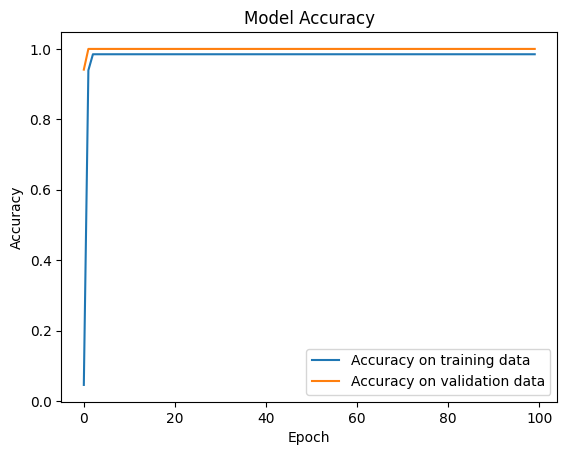

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Подготовка данных для анализа настроения
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = []
for line in texts:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

# Максимальная длина последовательности
max_len = max([len(seq) for seq in sequences])

# Подготовка данных для обучения
sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in sequences])
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели для анализа настроения
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len - 1),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели и сохранение истории
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

# График обучения
plt.plot(history.history['accuracy'], label='Accuracy on training data')
plt.plot(history.history['val_accuracy'], label='Accuracy on validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Assume you have new texts
new_texts = ["This is a new text for analysis.", "Another example text."]

# Convert new texts to sequences
new_sequences = []
for line in new_texts:
    encoded = tokenizer.texts_to_sequences([line])[0]
    new_sequences.append(encoded)

# Pad sequences
new_sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in new_sequences])

# Make predictions
predictions = model.predict(new_sequences)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Output predicted classes
for text, predicted_class in zip(new_texts, predicted_classes):
    print(f"Text: '{text}' -> Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Text: 'This is a new text for analysis.' -> Predicted class: 0
Text: 'Another example text.' -> Predicted class: 0



### 3. Кластеризация Текста
Для кластеризации мы будем использовать K-Means, чтобы сгруппировать тексты на основе их содержимого.



### 4. Классификация Текста
Для классификации текста на основе категорий обучим модель, аналогично анализу настроения.



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0116 - loss: 4.2318   
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8603 - loss: 4.0106 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9690 - loss: 3.8000 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 3.5361 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 3.1860 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 2.7598 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 2.2830 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 1.7631 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9612 - loss: 1.3162 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.9342 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.6783 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9612 - l

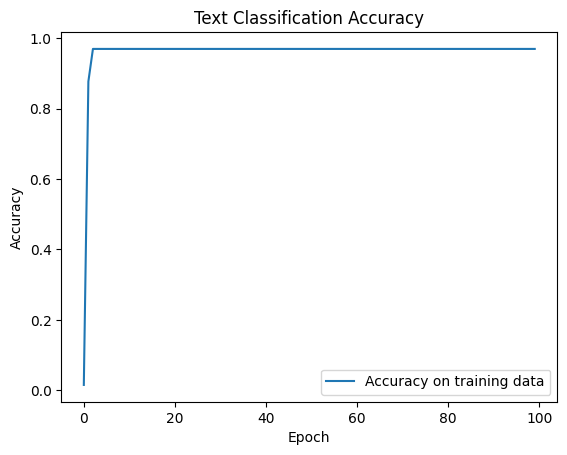

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Подготовка данных для классификации
X_train, X_test, y_train, y_test = train_test_split(texts, classification_labels, test_size=0.2, random_state=42)

# Преобразование текстов в последовательности
sequences = []
for line in X_train:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)

# Установка максимальной длины последовательности
max_len = max(len(seq) for seq in sequences)

# Подготовка данных для обучения
sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in sequences])
X_class, y_class = sequences[:, :-1], sequences[:, -1]
y_class = to_categorical(y_class, num_classes=len(tokenizer.word_index) + 1)

# Создание и обучение модели
model_class = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len - 1),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Компиляция и обучение модели
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_class = model_class.fit(X_class, y_class, epochs=100, verbose=1)

# График обучения
plt.plot(history_class.history['accuracy'], label='Accuracy on training data')
plt.title('Text Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Пример предсказания
new_texts = ["A wonderful and engaging documentary"]
new_texts_sequences = tokenizer.texts_to_sequences(new_texts)

# Паддинг последовательностей
new_texts_padded = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in new_texts_sequences])

# Убедитесь, что длина padded последовательностей соответствует max_len
if new_texts_padded.shape[1] != max_len:
    new_texts_padded = np.pad(new_texts_padded, ((0, 0), (0, max_len - new_texts_padded.shape[1])))

predictions = model_class.predict(new_texts_padded)

# Получение индекса предсказанной категории
predicted_index = np.argmax(predictions)

# Словарь для преобразования меток
sentiment_mapping = {
    "positive": 1,
    "negative": 0,
    "neutral": 2
}

# Обратный словарь для получения метки по индексу
reverse_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}

# Получение метки настроения
predicted_sentiment = reverse_sentiment_mapping.get(predicted_index, "Unknown category")

# Преобразование метки в числовые значения
numerical_sentiment_label = sentiment_mapping.get(predicted_sentiment, "Unknown")

print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Numerical Sentiment Label: {numerical_sentiment_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Sentiment: negative
Numerical Sentiment Label: 0



## Заключение

Создание RNN моделей с использованием TensorFlow открывает широкие возможности для решения различных задач. Ключ к успеху заключается в правильной подготовке данных, грамотном выборе архитектуры сети и настройке гиперпараметров. Используя приведенные выше шаги, вы сможете разрабатывать и обучать модели RNN для различных приложений, начиная от предсказания временных рядов и заканчивая обработкой естественного языка.
